In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data presented herein is from a publically available dataset and can be found here: [https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks]

In [35]:
data = pd.read_csv('D:\Data\Data Science\spotify_data.csv')

This dataset contains many attributes about the sonic characteristics of over 160,000 songs. More information about each characteristic can be found here: [https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/]

In [36]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


First, I wished to visualize how the danceability of music has changed over the past 100 years. According to Spotify, "danceability measures how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity." I found that there was a severe dip in danceability during the 1950s, and then a slow but steady increase into the new millenium. Danceability then spiked after the 2010s.

Text(0, 0.5, 'Danceability')

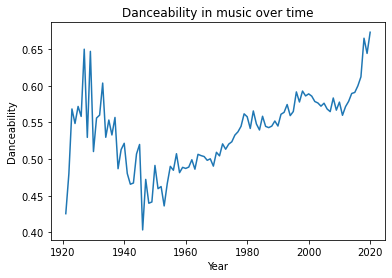

In [37]:
dance_years = data.groupby('year')['danceability'].mean()
dance_years.plot()
plt.title('Danceability in music over time')
plt.xlabel('Year')
plt.ylabel('Danceability')

For subsequent plots, the Spotify music data has been randomly sampled to 5000 rows to aid in visibility. Please not that this does not change the analysis or interpretation of the data.

In [38]:
sample = data.sample(n = 5000)

I next wished to characterize the relationships between particular musical characteristics, initially by comparing danceability and valence. Spotify describes valence as "the musical positiveness conveyed by a track. Tracks with high valence sound more positve, while tracks with low valence sound more negative." I found a significant positive correlation, where more danceable tracks were considered more positive. 

Text(0, 0.5, 'Danceability')

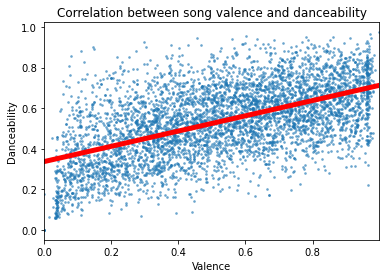

In [39]:
plt.figure()
sns.regplot(sample['valence'], sample['danceability'], scatter_kws = {'s' : 3 , 'alpha': 0.5}, line_kws = {'color': 'red', 'lw' : 5})
plt.title('Correlation between song valence and danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')

I then characterized the relationship between song tempo (number of beats per minute) and danceability. My reasoning for this was that I assumed songs with higher danceability would have faster tempos. However, my analysis revealed a slightly more complicated relationship. It seems that danceability increases with tempo up to a point, and then decreases. I assume there is a sweet spot of ~120bpm that makes music feel the danciest. Tracks slower than this don't feel like dance tracks, and tracks faster than this are too fast to dance to.

(0.0, 1.0)

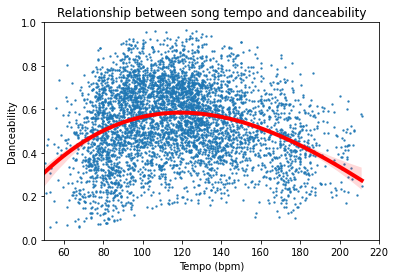

In [33]:
plt.figure()
sns.regplot(sample['tempo'], sample['danceability'], scatter_kws = {'s' : 2}, line_kws = {'color': 'red', 'lw': 4}, order = 3)
plt.title('Relationship between song tempo and danceability')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.xlim([50,220])
plt.ylim([0,1])